In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = 'C:\\Users\\kim\\Downloads\\sentiment labelled sentences\\sentiment labelled sentences\\amazon_cells_labelled.txt'
raw = pd.read_csv(filepath, delimiter='\t', header=None)
raw.columns=['comment','label']

In [3]:
keywords = ['great', 'excellent', 'good', 'highly', 'sweetest', 'easy']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    #raw[str(key)]= raw.applymap(lambda x: 1 if str(key) in str(x).lower() else 0)
    comment = raw['comment'].str.lower()
    raw[str(key)] = np.where(comment.str.contains(str(key), case=False, na=False), '1', '0')
    

In [4]:
raw=raw.apply(lambda x: pd.to_numeric(x, errors='ignore'))

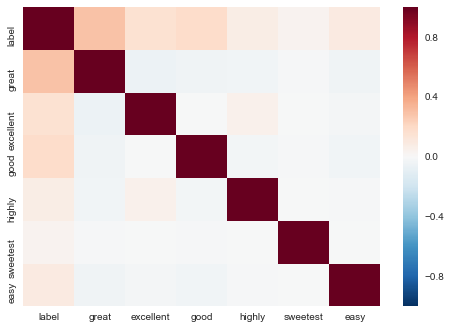

In [5]:
sns.heatmap(raw.corr())

In [6]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [11]:
data = raw[keywords]
data.head()

,great,excellent,good,highly,sweetest,easy
0,0,0,0,0,0,0
1,0,1,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, raw['label'], test_size=0.4, random_state=0)

In [9]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, raw['label'])

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (y_test != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 135


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fn

127

From the confusion matrix, we can see that the model we created has a high False Negative rate.  This means that we said a comment was negative when it wasn't.  Let's revisit the features to see if we can make this more accurate.

____________________________________Model 2_________________________________________________________

In [23]:
data.head()

,great,excellent,good,highly,sweetest,easy
0,0,0,0,0,0,0
1,0,1,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0


In [30]:
keywords = ['great', 'excellent', 'good', 'highly', 'sweetest', 'easy', 'best']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    #raw[str(key)]= raw.applymap(lambda x: 1 if str(key) in str(x).lower() else 0)
    comment = raw['comment'].str.lower()
    raw[str(key)] = np.where(comment.str.contains(str(key), case=False, na=False), '1', '0')

In [31]:
data = raw[keywords]
data.head()

,great,excellent,good,highly,sweetest,easy,best
0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, raw['label'], test_size=0.4, random_state=0)
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, raw['label'])

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (y_test != y_pred).sum()
))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fn

Number of mislabeled points out of a total 1000 points : 127


119

That's a little better.  We're down from 127 to 119.  Let's try again.  Model 3

In [48]:
keywords = ['great', 'excellent', 'good', 'highly', 'sweetest', 'easy', 'best', 'nice']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    #raw[str(key)]= raw.applymap(lambda x: 1 if str(key) in str(x).lower() else 0)
    comment = raw['comment'].str.lower()
    raw[str(key)] = np.where(comment.str.contains(str(key), case=False, na=False), '1', '0')
    X_train, X_test, y_train, y_test = train_test_split(data, raw['label'], test_size=0.4, random_state=0)
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

data = raw[keywords]

# Fit our model to the data.
bnb.fit(data, raw['label'])

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (y_test != y_pred).sum()
))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fn

Number of mislabeled points out of a total 1000 points : 125


116

Little better..............  Model 4

In [51]:
keywords = ['great', 'excellent', 'good', 'highly', 'sweetest', 'easy', 'best', 'nice', 'quality']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    #raw[str(key)]= raw.applymap(lambda x: 1 if str(key) in str(x).lower() else 0)
    comment = raw['comment'].str.lower()
    raw[str(key)] = np.where(comment.str.contains(str(key), case=False, na=False), '1', '0')
    X_train, X_test, y_train, y_test = train_test_split(data, raw['label'], test_size=0.4, random_state=0)
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

data = raw[keywords]

# Fit our model to the data.
bnb.fit(data, raw['label'])

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (y_test != y_pred).sum()
))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fn

Number of mislabeled points out of a total 1000 points : 124


114

Slightly better............. Model 5

In [53]:
keywords = ['great', 'excellent', 'good', 'highly', 'sweetest', 'easy', 'best', 'nice', 'quality', 'impressed', 'impress']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    #raw[str(key)]= raw.applymap(lambda x: 1 if str(key) in str(x).lower() else 0)
    comment = raw['comment'].str.lower()
    raw[str(key)] = np.where(comment.str.contains(str(key), case=False, na=False), '1', '0')
    X_train, X_test, y_train, y_test = train_test_split(data, raw['label'], test_size=0.4, random_state=0)
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

data = raw[keywords]

# Fit our model to the data.
bnb.fit(data, raw['label'])

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (y_test != y_pred).sum()
))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fn

Number of mislabeled points out of a total 1000 points : 130


112